### I. Introduction

#### Что такое experiment management?

Управление экспериментами в машинном обучении - это методология и набор инструментов, которые позволяют организовывать, отслеживать и контролировать эксперименты, данные и модели. Оно включает в себя управление версиями данных и моделей, запись параметров и метрик экспериментов, а также создание воспроизводимых рабочих процессов. Управление экспериментами обеспечивает прозрачность, репрезентативность и эффективность в процессе разработки и исследования моделей машинного обучения.

#### Зачем менеджить эксперименты?

Управление экспериментами облегчает сравнение различных моделей, обеспечивает воспроизводимость результатов и помогает определить наиболее эффективные стратегии, что в конечном итоге приводит к улучшению производительности модели и принятию обоснованных решений в процессе разработки.

Например, представим ситуацию, когда команда специалистов по анализу данных работает над разработкой модели для классификации изображений. Без правильного управления экспериментами было бы сложно отслеживать различные проведенные эксперименты, связанные с гиперпараметрами и соответствующими метриками производительности.

### II. Data Handling + Versioning

#### Data Handling and pre-processing: Pandas VS Polars
Перед тем как проводить эксперименты с обучением моделей, нужно удостовериться, что датасетом все в порядке, а если не в порядке,  то привести его в нужный вид *(почистить от шума, посмотреть на распределения значений параметров, решить, что делать с аутлаерами, проверить разметку, кодировку и тд)*

Сегодня мы сравним две популярные Python-библиотеки для работы с данными - 🐼 [Pandas](https://pandas.pydata.org/) и 🐻‍❄️[Polars](https://pola-rs.github.io/polars-book/)

#### Pandas 2.0

- Преимущества:
    - Более привлекательный синтаксис
    - Широко используется и хорошо документирован
    - Имеет большое сообщество пользователей и разработчиков
- Недостатки:
    - Может быть медленным, если работать с большими датасетами
     - Не настолько эффективен, как Polars, для некоторых операций *(filtering, selection, grouping, aggregations)*
#### Polars

- Преимущества:
    - Быстрее, чем Pandas: для вышеупомянутых операций и для работы с большими датасетами
- Недостатки:
    - Не так широко используется или хорошо документирован, как Pandas
    - Меньшее сообщество пользователей и разработчиков
    - Может быть сложно перейти с Pandas
    
А [по этой ссылке](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1) есть более детальное сравнение основных методов и функций в двух библиотеках

**Rule of thumb:** Если вы работаете с большими датасетами и производительность имеет решающее значение, стоит подумать о Polars. В остальных случаях Pandas может быть лучшим вариантом.

#### Версионирование данных. DVC 
Версионирование данных - это процесс отслеживания и контроля изменений в датасетах, с течением времени. Основная идея: если сохранять и фиксировать состояние данных в разные моменты времени, это обеспечивает воспроизводимость экспериментов и позволяет легко вернуться к предыдущим версиям данных,  принеобходимости.

Один из инструментов, позволяющих удобно версионировать данные -- это [DVC](https://dvc.org/).<br>
DVC позволяет эффективно управлять версиями датасетов и сохранять их состояние в репозитории. 

#### Как data scientist(DS) может использовать DVC?

1. Для версионирования датасетов: <br>
С помощью DVC можно хранить и управлять разными версиями датасетов, обеспечивая воспроизводимость и поддерживая консистентность данных, используемых в экспериментах. Это особенно полезно при совместной работе в команде или на долгосрочных проектах, где данные постепенно изменяются с ходом времени.

**Пример использования:** работая над проектом по классификации отзывов пользователей о  продукте, можно использовать DVC для отслеживания изменений в данных для обучения. С помощью DVC можно контролировать версии данных, отслеживать разметку или этапы предобработки,  делиться ими с коллегами,  а главное -- воспроизводить точную версию датасета в любой момент времени.

2. Для ML-моделей:<br>
DVC также может быть использован в качестве реестра ЬД-моделей( сохранять разные версии моделей, отслеживать параметры модели и метрики производительности, а также легко переключаться между разными версиями модели при развертывании или тестировании в разных средах)

**Пример использования:** Если вы работаете над системой рекомендаций, может использовать DVC для версионирования модели рекомендательной системы. С DVC можно легко сравнивать производительность разных версий своей модели, экспериментировать с разными гиперпараметрами и при необходимости возвращаться к предыдущим версиям модели.

3. Пайплайны:<br>
DVC хорошо интегрируется с оркестраторами рабочих процессов, такими как [Airflow](https://airflow.apache.org/docs/), позволяя строить комплексные пайплайны обработки данных.

**Пример использования:** Можно определить пайплайн, который автоматически загружает последнюю версию датасета, проводит предобработку, обучает модель и оценивает ее производительность. Это обеспечивает эффективный эксперимент и обеспечивает воспроизводимость на разных этапах процесса машинного обучения.

У DVC [обширная документация](https://dvc.org/doc/use-cases) с описанием разных примеров использования

### III. Experiment Management

Помимо  DVC существуют другие инструменты для управления экспериментами, такие как [MLflow](https://mlflow.org/) и [W&B (Weights & Biases)](https://wandb.ai/site) 

**MLflow**
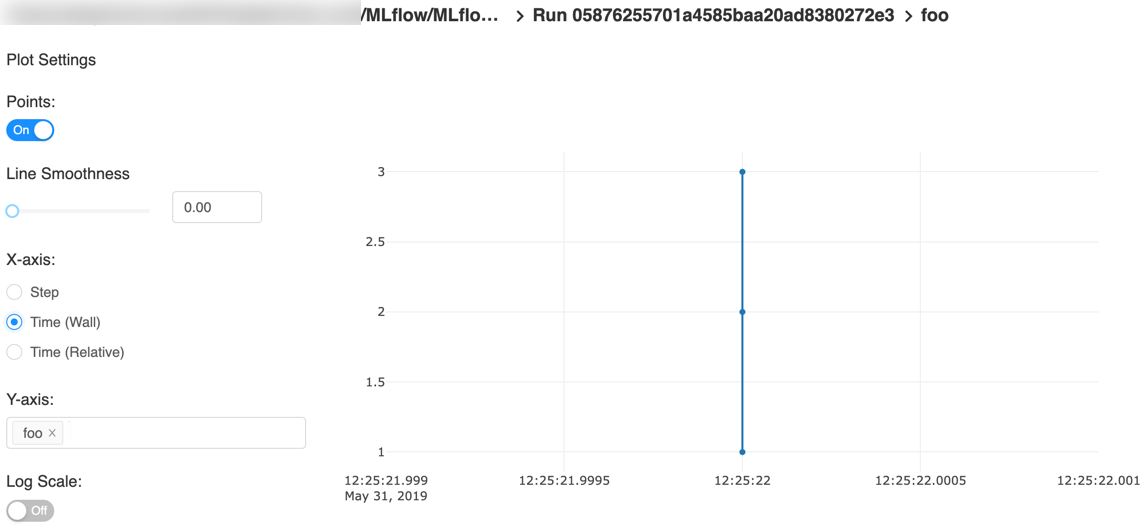
Открытая платформа для управления жизненным циклом моделей машинного обучения. Она предоставляет инструменты для организации, отслеживания и воспроизводимости экспериментов, управления моделями и совместной работы над проектами машинного обучения. MLflow предоставляет возможности для регистрации и отслеживания моделей, записи параметров и метрик экспериментов, а также визуализации результатов. Это упрощает процесс разработки, сравнения и развертывания моделей, способствуя коллаборации между рисерчерами. 

**Weights & Biases (W&B)** - 
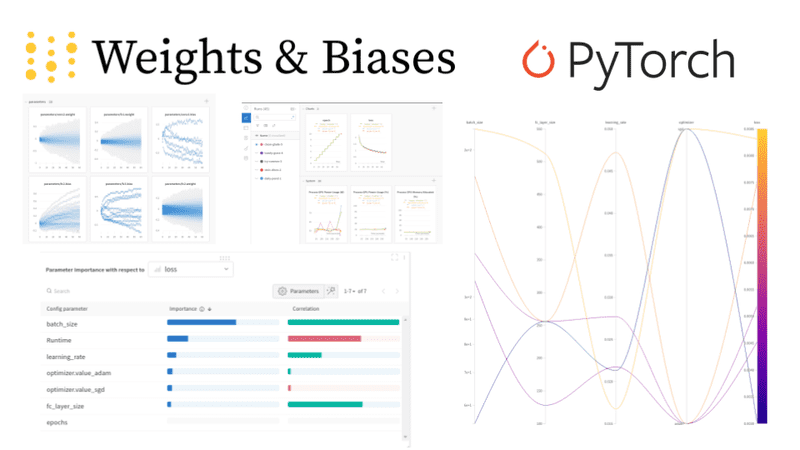

Платформа для отслеживания экспериментов и визуализации результатов в области машинного обучения. Она предоставляет инструменты и интеграции, которые помогают DS легко отслеживать и управлять параметрами, метриками и артефактами экспериментов. С помощью W&B DS могут визуализировать результаты экспериментов, анализировать производительность моделей и делиться результатами с коллегами. 

#### Сравним оба фреймворка
- **Отслеживание экспериментов:** Как W&B, так и MLflow предоставляют возможности для отслеживания экспериментов, позволяя DS регистрировать параметры, метрики и артефакты во время экспериментов. Однако W&B предлагает более продвинутые инструменты визуализации и анализа результатов экспериментов, что упрощает интерпретацию и получение инсайтов из данных.

- **Управление моделями:** MLflow обладает более обширными возможностями для управления моделями, включая упаковку моделей, версионирование и развертывание. Он предлагает встроенный реестр моделей для удобного отслеживания и управления версиями моделей. W&B, с другой стороны, сконцентрирован на отслеживании экспериментов и визуализации, а не на обширных функциях управления моделями.

- **Коллаборативность:** W&B акцентирует внимание на совместной работе между участниками команды. Он предоставляет интерактивные интерфейсы для обмена результатами экспериментов, упрощая совместную работу, обратную связь и обсуждения. MLflow также поддерживает совместную работу, но его основной упор сделан на воспроизводимость и управление рабочими процессами машинного обучения.

- **Экосистема и интеграции:** MLflow обладает более широкой экосистемой и поддерживает широкий спектр интеграций с другими популярными инструментами и фреймворками в экосистеме машинного обучения. Он легко интегрируется с популярными библиотеками, такими как TensorFlow, PyTorch и scikit-learn. W&B также имеет интеграции с различными фреймворками, но диапазон интеграций может быть более узким по сравнению с MLflow.

- **Пользовательское сообщество:** У W&B и MLflow есть активные пользовательские сообщества, обширная документация и поддержка. MLflow получает преимущества от того, что является проектом с открытым исходным кодом, тогда как W&B предлагает сильную поддержку и взаимодействие с пользовательским сообществом.

W&B хорошо подходит для интерактивной визуализации и совместной работы, в то время как MLflow предлагает более обширные возможности для управления моделями и интеграции с рабочим процессом машинного обучения.
В конечном счете, выбор между W&B и MLflow зависит от конкретных потребностей и предпочтений ученого данных или команды.

### IV. Hyperparameter Search

Поиск гиперпараметров - это процесс выбора оптимальных значений гиперпараметров модели машинного обучения, которые не могут быть автоматически определены во время обучения. Поиск гиперпараметров включает в себя экспериментирование с различными значениями гиперпараметров, оценку и сравнение моделей с целью выбора наилучшего набора гиперпараметров. Это важный этап в разработке моделей машинного обучения для достижения наилучшей производительности и обобщающей способности модели.

Для поиска гиперпараметров есть две удобные библиотеки: [Optuna](https://optuna.org/) и [HyperOpt](http://hyperopt.github.io/hyperopt/)

In [4]:
# в качестве примера найдем минимум функции y=(x - 2) ** 2
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

print(study.best_params)  # наилучшее значение x

[I 2023-05-15 17:34:03,928] A new study created in memory with name: no-name-37b2bfed-849b-45be-bc27-aa342bafd9d8
[I 2023-05-15 17:34:03,933] Trial 0 finished with value: 132.16651048973117 and parameters: {'x': -9.496369448209776}. Best is trial 0 with value: 132.16651048973117.
[I 2023-05-15 17:34:03,944] Trial 1 finished with value: 57.455035670656635 and parameters: {'x': -5.579910004126476}. Best is trial 1 with value: 57.455035670656635.
[I 2023-05-15 17:34:03,950] Trial 2 finished with value: 13.572599182506123 and parameters: {'x': 5.684100864865961}. Best is trial 2 with value: 13.572599182506123.
[I 2023-05-15 17:34:03,963] Trial 3 finished with value: 16.3782269805247 and parameters: {'x': -2.047002221462783}. Best is trial 2 with value: 13.572599182506123.
[I 2023-05-15 17:34:03,978] Trial 4 finished with value: 47.88558297356582 and parameters: {'x': 8.919940966046301}. Best is trial 2 with value: 13.572599182506123.
[I 2023-05-15 17:34:03,989] Trial 5 finished with value:

{'x': 2.0070955270026967}


In [5]:
print(study.best_params)  

{'x': 2.0070955270026967}


In [19]:
import hyperopt

def objective(val):
    return (val-2) ** 2    

# define a search space
from hyperopt import hp
space = hp.uniform('x', -10, 10) #distribution

# minimize the objective over the space
from hyperopt import fmin, tpe
best = fmin(objective, space, algo=tpe.suggest, max_evals=100)

print(best)

print(hyperopt.space_eval(space, best))


100%|███████████████████████████████████| 100/100 [00:00<00:00, 180.41trial/s, best loss: 8.711104771212909e-05]
{'x': 1.9906666700630413}
1.9906666700630413


Давайте их сравним:

| Feature | Optuna VS Hyperopt |
|---|---|
|**API**|Optuna удобнее (search space+objective в одной функции)|
|**Options, methods, and hyperparams)**|одинаково  хороши|
|**Optimization**|оба используют одинаковай алгоритм оптимизации,[Tree of Parzen Estimators](https://docs.openvino.ai/2021.4/pot_compression_optimization_tpe_README.html#:~:text=Tree%2DStructured%20Parzen%20Estimator%20(TPE)%20algorithm%20is%20designed%20to,provide%20best%20possible%20latency%20improvement.) (TPE).|
| **Коммьюнити** |у HyperOpt больше, чем коммьюнити Optuna|


А здесь [ссылка](https://neptune.ai/blog/optuna-vs-hyperopt) на более подробный обзор


Мы можем использовать инструменты, такие как Optuna и HyperOpt для автоматического поиска гиперпараметров внутри MLflow или W&B, в рамках управления экспериментами.

### V. Putting it all Together

Как можно использовать Optuna в W&B

In [20]:
import optuna
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import wandb


In [21]:
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 0.01, 10.0)
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predictions)
    return mse

In [23]:
wandb.init(project="hyperparameter-search", entity="ana-klowait")

wandb: Currently logged in as: ana-klowait. Use `wandb login --relogin` to force relogin


Problem at: /var/folders/3s/7zr3qj110993h9xz81ybhxxw0000gn/T/ipykernel_25757/465222402.py 1 <module>


CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [24]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and corresponding metrics
best_params = study.best_params
best_mse = study.best_value


[I 2023-05-15 17:57:33,362] A new study created in memory with name: no-name-7e2e5fe4-5312-4817-91ea-6c96058694e4
/var/folders/3s/7zr3qj110993h9xz81ybhxxw0000gn/T/ipykernel_25757/1546428023.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  alpha = trial.suggest_loguniform('alpha', 0.01, 10.0)
[W 2023-05-15 17:57:33,389] Trial 0 failed with parameters: {'alpha': 0.017396889665337364} because of the following error: NameError("name 'X_train' is not defined").
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/3s/7zr3qj110993h9xz81ybhxxw0000gn/T/ipykernel_25757/1546428023.py", line 4, in objective
    model.fit(X_train, y_train)
NameError: 

NameError: name 'X_train' is not defined

In [25]:
wandb.log({"Best MSE": best_mse, "Best Hyperparameters": best_params})


NameError: name 'best_mse' is not defined

### VI. Conclusion

Все,о чем мы говорили сегодня, еще раз, в буллет-поинтах:

- Воспроизводимость: В управлении экспериментами в машинном обучении важна воспроизводимость результатов для повышения надежности и проверки моделей.

- Управление экспериментами: Эффективное управление экспериментами обеспечивает систематическую организацию, отслеживание и анализ проводимых экспериментов для более точных и обоснованных решений.

- Версионирование данных: Версионирование данных позволяет отслеживать изменения, контролировать состояние и обеспечивать воспроизводимость наборов данных, что важно для точности и последовательности результатов.

- Версионирование моделей: Управление версионированием моделей помогает отслеживать и управлять изменениями в моделях, позволяет легко переключаться между версиями и обеспечивает эффективное развертывание и использование моделей.

- Поиск гиперпараметров: Поиск оптимальных гиперпараметров с использованием инструментов, таких как Optuna или HyperOpt, играет важную роль в настройке моделей и повышении их производительности.

Все эти аспекты совместно способствуют надежному и повторяемому процессу разработки и экспериментирования в проектах машинного обучения.

### Reflections
- Какой инструмент показался наиболее интересным?
- Был ли у вас опыт использования этих инстументов, если да, то каких, и какие впечатления?
- Есть ли у вас проекты, в которых вы могли бы использовать эти инструменты?